#Assignment 2 - Transliteration

In this task you are required to solve the transliteration problem of names from English to Russian. Transliteration of a string means writing this string using the alphabet of another language with the preservation of pronunciation, although not always.


## 0. Instructions

To complete the assignment please do the following  steps (all the three are requred to get the full credits): 

1. **Notebook**. Upload to Canvas a filled notebook with answers (this file). 
Please enter the questions inside this notebook where appropriate in the designated cells.

2. **Scripts**. In *Practical* part of this notebook you will be asked to implement a transformer-based approach for transliteration. Upload to Canvas your code which implements solution to this part in the form of *.py file (not *.ipynb notebooks) of the model:

  - ``translit.py`` 

This script should have the specific structure as it is shown in the baseline soultion [here](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/translit_baseline.py). So, you should implement your ``train`` and ``classify`` functions. Your model should be implemented as a special class/function in this script (be sure if you add any outer dependencies that everything is improted correctly and can be reproducable). 

Please make sure that you code does not contain any dependencies which are specific to your system.

  *Important*: to make sure everything works, please use ONLY the following software configuration (no matter which operating system you use): Anaconda 2020.07  distribution for Python 3.8 and PyTorch 1.3. The preferred way to install PyTorch is "conda install -c pytorch pytorch" and Torchtext is "conda install -c pytorch torchtext". There should be no additional libraries used: Anaconda already provides a sufficient number of them. If you need something just select from these available. Test for no the absence of dependencies by creating a virtual environment. 

3. **Shared task.** After the implementation of models' architectures you are asked to participate in the [competition](https://competitions.codalab.org/competitions/30932) to solve **Transliteration** task using your implemented code. **Important: indicate your team as 'Skoltech'!**

You should use your transliteration scripts from the previous part to train, validate, and generate predictions for the public (Practice) and private (Evaluation) test sets. For this you should use [``evaluate_translit.py``](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/evaluate_translit.py) script. 

It will produce predictions (``preds_translit.tsv``) for the dataset and score them if the true answers are present. You can use these scores to evaluate your model on dev set and choose the best one. Be sure:

1. To download the [dataset](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/TRANSLIT.tar.gz) and unzip it in the same folder where ``evaluate_translit.py`` is.
2. to put your ``translit.py`` and ``evaluate_translit.py`` scripts in the same folder. 
3. to change importing in ``evaluate_translit.py`` from ``translit_baseline`` import ``train, classify`` to ``from translit import train, classify``.

If you work in Colab you can dowload data and scripts with ``wget`` command and run them from notebook cells. 

Upload obtained TSV file with your predictions (``preds_translit.tsv``) in ``.zip`` for the best results to both phases of the competition.

Please, provide here in the notebook your user name in Codalab competition that we can recognize you in the leaderboard.


**YOUR USERNAME IN THE CODALAB LEADERBOARD:**

```

gerogeMK
```

##1. Theoretical part
Solve the following theoretical subtasks:


###1.1 Normalization

* The main part of transformer architecture is MultiHeadAttention. This layer is breafly explained in subsection 2.2, its logic is described with formulas:
$$
Attention(Q, K, V)=softmax\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V
$$
$$
MultiHead(Q, K, V) = Concat\left(head_1, ..., head_h\right) W^O \\
$$
$$
head_i = Attention \left(Q W_i^Q, K W_i^K, V W_i^V\right)
$$
$h$ - the number of attention heads - parallel sub-layers for Scaled Dot-Product Attention on a vector of smaller dimension ($d_{k} = d_{q} = d_{v} = d_{model} / h$). 

Explain your thoughts: what the reason of dividing before $softmax$ the elements of $QK^{T}$ by $\sqrt{d_{k}}$\,?

($d_k = d_{model} / h$ - dimentionality of vectors-keys, queries and values, $d_{model}$ - dimentionality of inout and output vectors at all layers, $h$ - number of attention heads).

What problems can arise making training less stable without devision by $\sqrt{d_{k}}$ and working with large $d_{model}$?


**Explain your thoughts: what the reason of dividing before $softmax$ the elements of $QK^{T}$ by $\sqrt{d_{k}}$\,?**
```
We obtain the dot product to find words in context that are mostly related to the target one. Generally the reason of softmax usage is to get scores of relation between 0 and 1, which will allow to compare the relativeness of the target word to other words in context. Since with the growth of the dot products softmax has smaller gradients, we want to have our dot products controlled ,s.t. the model will not be suffered by vanishing gradients, therefor we scale our dot products.

```
**What problems can arise making training less stable without devision by $\sqrt{d_{k}}$ and working with large $d_{model}$?**
```
As I have already said leaving training uncontrolled, may lead to the vanishing gradients.  More precisely, when a the obtained gradients through back propafation are small weights of the model are updated poorly,i.e. info obtained through the new epoch does not provide useful information for the model improvement, and vice versa may lead to deterioration of model performance. Thus, since sentence may have high dimension than each word wil get low score after sigmoid and therefore a model will not be able to correctly identify which with word in context a target word has the best connection.Therefore, to avoid such issues scalling by the squareroot of dimension stabilizes the process and leads to reduction in model instability.
```

###1.2 Complexity



* Let the input of Transformer be the sequence of $n$ tokens. Before it is processed by MultiHeadAttention layer (MHA) it corresponds to the sequence of vectors $x_{1} \ldots x_{n}$. Output from this layer -- if the sequence of vectors $y_{1} \ldots y_{n}$, vectors can be packed in a matrix $Y$ and be denoted with formula $Y = \mathbf{MHA}(x_{1} \ldots x_{n})$.
Imagine now that there is a hidden layer of a recurrent neural network that performs a transformation similar to the type of input and output $y_{i} = \mathbf{RecurrentLayer}(x_{1} \ldots x_{i})$.

* Let us introduce the function $path(i,j)$, which denotes the number of applications of various operations on the path of creating a vector $y_{j}$ from a sequence $x_{i} \ldots x_{j}$. In terms of O-big $O(\cdot)$, dependent from  $n$ describe, what equals $path(1,n)$ for recurrent layer and  MultiHeadAttention layer. 
e.x. $O(n\log(n)),O(n^{2}),O(1)$



```
MHA

Assume a model has h heads,then complexity is described as:

1) for each head we compute Q*W_i^q,K*W_i^k,V*W_i^v which are matrix multiplications with worst case complexity (Iterative algorithm) of n*n*n/h resulting in 3n*n*n/h for each head we get O(n^3)

2)Then we calculate attention of these matrices which is matrix multiplication of 3 matrices with complexity of n*n*n=O(n^3)

Reccurent Layer
It has a linear comlexity in case of input of length n, in case we has a path from 1 to n which denotes the number of applications of various operations on the path of creating a vector then we will have to spent time on computation for the previous time points which are of n amount. As a result we will get total complexity of O(n^3)
```




###1.3 Mask


The mask is applied to the weights of MultiHeadAttention in transformer before computing the weighted sum of value-vectors. Describe what types of masks are usually used.

```
Usually there are 2 main types of the masks that are used in the MHA of the Transformer: Look-ahead Mask and Padding Mask. First one limits usage of the words that are coming after the target word when a sequence is sent to encoder. Such an operation controls the procedure of word prediction, as inly previous inputs in the sequence should affect the prediction. Also each predeccessor of the prediction word are given a weight between 0 and 1 denoting the relativeness and importance of each word.
Second approach is a Padding masking. It is applied only when the input sequence is lower than the chosen maximum length then all the remaining positions are filled with zeroes and when a sequence is longer than maximum length then exceeding part is truncated to the desired dimension.


```

### 1.4 Positional encoding 

As you remember, Transformer treats an input sequence of elements as a time series. Since the Encoder inside the Transformer simultaneously processes the entire input sequence, the information about the position of the element needs to be encoded inside its embedding, since it is not identified in any other way inside the model. That is why the PositionalEncoding layer is used, which sums embeddings with a vector of the same dimension.
Let the matrix of these vectors for each position of the time series be denoted as $PE$. Then the elements of the matrix are:

$$ PE_{(pos,2i)} \ = \sin{(\frac{pos}{10000^{2i/d_{\ model}}} \ \  \ \ \ )}$$
$$ PE_{(pos,2i+1)} \ = \cos{(\frac{pos}{10000^{2i/d_{\ model}}}\ \ \ \ \ )}$$

where $pos$ - is the position, $i$ - index of the component of the corresponging vector, $d_{model}$ - dimension of each vector. Thus, even components represent sine values, and odd ones represent cosine values with different arguments.

***Task:*** propose ANOTHER way of positional encoding. Describe pros and cons of your method comparing to the described above.



Another approach is suggested in the paper "RETHINKING POSITIONAL ENCODING IN LANGUAGE PRE-TRAINING" by Guolin Ke, Di He & Tie-Yan Liu
They propose to directly model the relationships between a pair of words or positions by using different projection matrices to reduce BERT model inefficiencies.

```

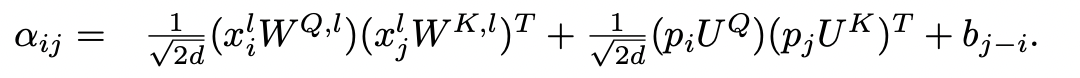

##2. Practical part

###2.1 Basic algorithm

In the  https://github.com/skoltech-nlp/filimdb_evaluation  there is a dataset and the baseline -- translit\_baseline.py. The basic algorithm is based on the following idea: for transliteration, alphabetic n-grams from one language can be transformed into another language into n-grams of the same size, using the most frequent transformation rule found according to statistics on the training sample. To test the implementation, clone the repository, unzip the datasets, and run the evaluation script. To do this, you need to run the following commands:
* `git clone https://github.com/skoltech-nlp/filimdb_evaluation.git`
* `cd filimdb_evaluation`
* `./init.sh translit`
* `python evaluate_translit.py`


In [1]:
import shutil
%cd /content
try:
  shutil.rmtree('/content/filimdb_evaluation')
except:
  pass

!git clone https://github.com/skoltech-nlp/filimdb_evaluation.git
%cd /content/filimdb_evaluation
!./init.sh translit
!mv /content/filimdb_evaluation/TRANSLIT /content/filimdb_evaluation/TRANSLIT1
!mv /content/filimdb_evaluation/TRANSLIT1/TRANSLIT /content/filimdb_evaluation
!mv /content/filimdb_evaluation/tests/test_translit_implementation.py /content/filimdb_evaluation
shutil.rmtree('/content/filimdb_evaluation/TRANSLIT1')
!pip install fire
!python evaluate_translit.py

/content
Cloning into 'filimdb_evaluation'...
remote: Enumerating objects: 540, done.
remote: Total 540 (delta 0), reused 0 (delta 0), pack-reused 540
Receiving objects: 100% (540/540), 121.01 MiB | 17.12 MiB/s, done.
Resolving deltas: 100% (293/293), done.
/content/filimdb_evaluation
TRANSLIT/
TRANSLIT/dev.tsv
TRANSLIT/dev_small.tsv
TRANSLIT/test.tsv
TRANSLIT/train.tsv
TRANSLIT/train_small.tsv
FILIMDB/
FILIMDB/train.labels
FILIMDB/train_unlabeled.texts
FILIMDB/test.texts
FILIMDB/train.texts
FILIMDB/dev.labels
FILIMDB/dev.texts
FILIMDB/dev-b.labels
FILIMDB/dev-b.texts
FILIMDB/test-b.texts
PTB/ptb.train.txt
PTB/
PTB/README
PTB/ptb.test.txt
PTB/ptb.valid.txt
     |████████████████████████████████| 87 kB 8.3 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=313a5d16b1b279ac2657c10da69153f52c288622805f69ce9ec6fe6a52e0a160
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fi

###2.2  Transformer-based approach


To implement your algorithm, use the template code, which needs to be modified.

Files to be used:
* `translit.py` - the main file where you need to make changes to be uploaded.
* `test_implementation.py` - file for testing the modules that you will need to implement as part of this task.
* `translit_utils` - folder with two `.py` files, which implements the logic of working with data and counting metrics.
First, you need to add some details in the code of the Transformer architecture, implement the methods of the class `LrScheduler`, which is responsible for updating the learning rate during training.
Next, you need to select the hyperparameters for the model according to the proposed guide.


Script `translit.py` contains the following elements:

* architecture of the Transformer as a class inheriting `torch.nn.Module`;
* algorithm of learning and classification in the form of  functions train and classify. Two these functions are the most important in this script.


####2.2.1  Positional Encoding

As you remember, Transformer treats an input sequence of elements as a time series. Since the Encoder inside the Transformer simultaneously processes the entire input sequence, the information about the position of the element needs to be encoded inside its embedding, since it is not identified in any other way inside the model. That is why the PositionalEncoding layer is used, which sums embeddings with a vector of the same dimension.
Let the matrix of these vectors for each position of the time series be denoted as $PE$. Then the elements of the matrix are:

$$ PE_{(pos,2i)} = \sin{(pos/10000^{2i/d_{model}})}$$
$$ PE_{(pos,2i+1)} = \cos{(pos/10000^{2i/d_{model}})}$$

where $pos$ - is the position, $i$ - index of the component of the corresponging vector, $d_{model}$ - dimension of each vector. Thus, even components represent sine values, and odd ones represent cosine values with different arguments.

In this task you are required to implement these formulas inside the class constructor *PositionalEncoding* in the main file ``translit.py``, which you are to upload. To run the test use the following command:

`python test_implementation.py test_positional_encoding`

Make sure that there is no any `AssertionError`!


In [2]:
%cd /content/filimdb_evaluation



/content/filimdb_evaluation


In [3]:
!pip install Levenshtein

     |████████████████████████████████| 258 kB 4.0 MB/s 
     |████████████████████████████████| 1.8 MB 54.3 MB/s 
     |████████████████████████████████| 103 kB 62.6 MB/s 


In [5]:
!python test_translit_implementation.py test_positional_encoding

Test is passed!


####2.2.2  MultiHeadAttention


Then you are required to implement `attention` method in the class  `MultiHeadAttention`. The MultiHeadAttention layer takes as input  query vectors, key and value vectors for each step of the sequence of matrices  Q,K,V correspondingly. Each key vector, value vector, and query vector is obtained as a result of linear projection using one of three trained vector parameter matrices from the previous layer. This semantics can be represented in the form of formulas:
$$
Attention(Q, K, V)=softmax\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V\\
$$

$$
MultiHead(Q, K, V) = Concat\left(head_1, ... , head_h\right) W^O\\
$$

$$
head_i=Attention\left(Q W_i^Q, K W_i^K, V W_i^V\right)\\
$$
$h$ - the number of attention heads - parallel sub-layers for Scaled Dot-Product Attention on a vector of smaller dimension ($d_{k} = d_{q} = d_{v} = d_{model} / h$). 
The logic of  \texttt{MultiHeadAttention} is presented in the picture (from original  [paper](https://arxiv.org/abs/1706.03762)):

![](https://lilianweng.github.io/lil-log/assets/images/transformer.png)


Inside a method `attention` you are required to create a dropout layer from  MultiHeadAttention class constructor. Dropout layer is to be applied directly on the attention weights - the result of softmax operation. Value of drop probability  can be regulated in the train in the `model_config['dropout']['attention']`.

The correctness of implementation can be checked wi
th
`test_implementation.py`:

```
python test_implementation.py test_multi_head_attention
```


In [6]:
!python test_translit_implementation.py test_multi_head_attention

Name: query, shape: torch.Size([2, 1, 3, 5])
Name: key, shape: torch.Size([2, 1, 3, 5])
Name: value, shape: torch.Size([2, 1, 3, 5])
Name: mask, shape: torch.Size([2, 1, 3, 3])
Test is passed!


####2.2.3  LrScheduler

The last thing you have to prepare is the class  `LrScheduler`, which is in charge of  learning rate updating after every step of the optimizer. You are required to fill the class constructor and the method `learning_rate`. The preferable stratagy of updating the learning rate (lr), is the following two stages:

* "warmup" stage - lr linearly increases until the defined value during the fixed number of steps (the proportion of all training steps - the parameter `train_config['warmup\_steps\_part']` in the train function). 
* "decrease" stage - lr linearly decreases until 0 during the left training steps.

`learning_rate()` call should return the value of  lr at this step,  which number is stored at self.step. The class constructor takes not only `warmup_steps_part` but the peak learning rate value `lr_peak` at the end of "warmup" stage and a string name of the strategy of learning rate scheduling. You can test other strategies if you want to with `self.type attribute`. 

Correctness check:

```
python test_implementation.py test_lr_scheduler
```


In [7]:
!python test_translit_implementation.py test_lr_scheduler

Test is passed!


###2.3  Hyper-parameters choice


The model is ready. Now we need to find the optimal hyper-parameters.

In the repository in the TRANSLIT directory, in addition to train, there is also a dev samples and reduced versions of train and dev. The quality of models with different hyperparameters should be monitored on dev or on dev_small samples (in order to save time, since generating transliterations is a rather time-consuming process, comparable to one training epoch). Copy the existing code from `translit.py` into a new script and implement the required evaluation code there in the train function.
To generate predictions, you can use the `generate_predictions` function, to calculate the accuracy@1 metric, you can use the `compute_metrics` function from the `metrics.py script in the translit_utils directory.



Hyper-parameters are stored in the dictionary `model_config` and `train_config` in train function. The following hyperparameters in `model_config` and `train_config` are suggested to leave unmodified:

* n_layers $=$ 2
* n_heads $=$ 2
* hidden_size $=$ 128
* fc_hidden_size $=$ 256
* warmup_steps_part $=$ 0.1
* batch_size $=$ 200

 You can vary the dropout value. The model has 4 types of : ***embedding dropout*** applied on embdeddings before sending to the first layer of  Encoder or Decoder, ***attention*** dropout applied on the attention weights in the MultiHeadAttention layer, ***residual dropout*** applied on the output of each sublayer (MultiHeadAttention or FeedForward) in layers Encoder and Decoder and, finaly, ***relu dropout*** in used in FeedForward layer. For all 4 types it is suggested to test the same value of dropout from the list: 0.1, 0.15, 0.2.
 Also it is suggested to test several peak levels of learning rate - **lr_peak** : 5e-4, 1e-3, 2e-3.

Note that if you are using a GPU, then training one epoch takes about 1 minute, and up to 1 GB of video memory is required. When using the CPU, the learning speed slows down by about 2 times. If there are problems with insufficient RAM / video memory, reduce the batch size, but in this case the optimal range of learning rate values will change, and it must be determined again. To train a model with  batch_size $=$ 200 , it will take at least 300 epochs to achieve accuracy 0.66 on dev_small dataset.

In [ ]:
!pip install Levenshtein
!python evaluate_translit.py

# Grid Search Over parameters on the train_small and dev_small

In [ ]:
%cd /content/filimdb_evaluation
from torch.utils.tensorboard import SummaryWriter


### If you want to recover Grid Search which takes ~ 5 hours then u should use translit_GS.py which I also uploaded, other wise use translit.py

In [ ]:
#!for i in {0.1,0.15,0.2};do for j in {0.1,0.15,0.2};do for k in {0.1,0.15,0.2};do for m in {0.1,0.15,0.2};do for s in {0.0003,0.0005,0.001,0.002};do python translit.py -l $i $j $k $m $s; done; done; done; done; done


Streaming output truncated to the last 5000 lines.
** End of epoch, accumulated average loss = 1.227771 **
** Elapsed time: 0:00:00**
0.0003

----------------------------------------
Epoch: 179
Run training...
10it [00:00, 35.15it/s]
** End of epoch, accumulated average loss = 1.225069 **
** Elapsed time: 0:00:00**
0.0003

----------------------------------------
Epoch: 180
Run training...
10it [00:00, 34.76it/s]
** End of epoch, accumulated average loss = 1.217840 **
** Elapsed time: 0:00:00**
0.0003

----------------------------------------
Epoch: 181
Run training...
10it [00:00, 36.47it/s]
** End of epoch, accumulated average loss = 1.211163 **
** Elapsed time: 0:00:00**
0.0003

----------------------------------------
Epoch: 182
Run training...
10it [00:00, 37.06it/s]
** End of epoch, accumulated average loss = 1.217895 **
** Elapsed time: 0:00:00**
0.0003

----------------------------------------
Epoch: 183
Run training...
10it [00:00, 37.08it/s]
** End of epoch, accumulated avera

*Question: What are the optimal hyperpameters according to your experiments? Add plots or other descriptions here.* 

First of all,after implementation of all blocks i decided to grid search all the suggested parameters on 400 epochson train_small and dev_small sets:

*Dropout:*

1)embedding: [0.1,0.15,0.2]

2)attention: [0.1,0.15,0.2] 

3)residual: [0.1,0.15,0.2]

4)relu: [0.1,0.15,0.2]

*Learning rate peak* :[3e-4,5e-4, 1e-3, 2e-3]

In total getting 324 models to train. Obtained results lied in the interval between 31% to 49.7% accuracy. In the below image we can see top of the obtained models


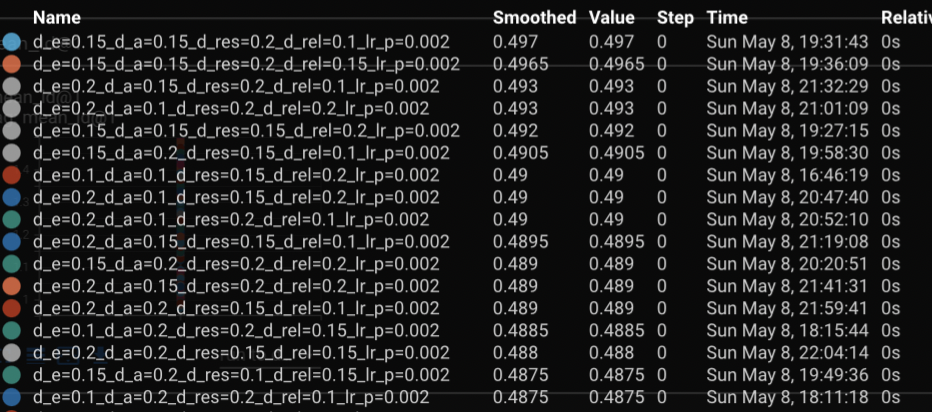

As can seen from the table the best scores were obtained by model with 0.002 peak of the Learning Rate, while distribution of other parameters in the top is not subject to any trend. Such a phenomenon may be caused by the fact that lower values of the peak LR are not enough for the model to train, since lr increases and decreases lineraly, i.e. is even lower  before and after the peak. Maybe the better solution was to use linear increase during the warm up period and then decrease learning rate not linearly, but reduce it euther on plateau or scale it after each N epochs are done, such a strategy may improve the prformance of the model.
The best model was trained on the full training set for 700 epochs and the final score on the Codalab was 64.8%. However , the result trained on the 100 epochs does not differ so much , thus there might be sign of overfit.

##3. Research part

We suggest to implement an additional regularization method - **label smoothing**. Now imagine that we have a prediction vector from probabilities at position t in the sequence of tokens for each token id from the vocabulary. CrossEntropy compares it with ground truth one-hot representation

$$[0, ... 0, 1, 0, ..., 0].$$

And now imagine that we are slightly "smoothed" the values in the ground truth vector and obtained

$$[\frac{\alpha}{|V|}, ..., \frac{\alpha}{|V|}, 1(1-\alpha)+\frac{\alpha}{|V|},  \frac{\alpha}{|V|}, ... \frac{\alpha}{|V|}],$$

where $\alpha$ - parameter from 0 to 1, $|V|$ - vocabulary size - number of components in the ground truth vector. The values ​​of this new vector are still summed to 1. Calculate the cross-entropy of our prediction vector and the new ground truth. Now, firstly, cross-entropy will never reach 0, and secondly, the result of the error function will require the model, as usual, to return the highest probability vector compared to other components of the probability vector for the correct token in the dictionary, but at the same time not too large, because as the value of this probability approaches 1, the value of the error function increases. For research on the use of label smoothing, see the [paper](https://arxiv.org/abs/1906.02629).
    
Accordingly, in order to embed label smoothing into the model, it is necessary to carry out the transformation described above on the ground truth vectors, as well as to implement the cross-entropy calculation, since the used `torch.nn.CrossEntropy` class is not quite suitable, since for the ground truth representation of `__call__` method takes the id of the correct token and builds a one-hot vector already inside. However, it is possible to implement what is required based on the internal implementation of this class [CrossEntropyLoss](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html#CrossEntropyLoss).
    

Test different values of $\alpha$ (e.x, 0.05, 0.1, 0.2). Describe your experiments and results.



As i have stated above produced Grid Search over all the suggested parameters , for the train_small and dev_small data sets. However, introduction of additional searchable parameter will be very time consuming.Thus I decided to choose top-3 found combination of parameters of dropout and peak learning rate and then iterate over Grid Search over the smoothness parameters on 400 epochs. The results were following:

dropout embedding|  dropout attention |dropout residual| dropout relu| lr_peak          | smoothnes parameter|resulted acc1|
:----------:|:--------:|:-------:|:-------------:|:------------:|:-------------:|:-------------:|
0.15 |0.15 |0.2 |0.1 | 0.002 | **0.025**| **0.4745**|
0.15 |0.15 |0.2 |0.15| 0.002|**0.025**|**0.491**|
0.2 |0.15 |0.2 |0.1| 0.002|**0.025**|**0.0.487**|
0.15 |0.15 |0.2 |0.1 | 0.002 | **0.05**| **0.4925**|
0.15 |0.15 |0.2 |0.15| 0.002|**0.05**|**0.491**|
0.2 |0.15 |0.2 |0.1| 0.002|**0.05**|**0.4925**|
0.15 |0.15 |0.2 |0.1 | 0.002 | **0.1**|**0.481**|
0.15 |0.15 |0.2 |0.15| 0.002|**0.1**|**0.485**|
0.2 |0.15 |0.2 |0.1| 0.002|**0.1**|**0.485**|
0.15 |0.15 |0.2 |0.1 | 0.002 | **0.15**| **0.4955**|
0.15 |0.15 |0.2 |0.15| 0.002|**0.15**|**0.4905**|
**0.2** |**0.15** |**0.2**|**0.1**| **0.002**|**0.15**|**0.5055**|
0.15 |0.15 |0.2 |0.1 | 0.002 | **0.2**| **0.0.491**|
**0.15**| **0.15**|**0.2** |**0.15**| **0.002**|**0.2**|**0.5005**|
0.2 |0.15 |0.2 |0.1| 0.002|**0.2**|**0.494**|


As can bee seen from the table the best scores on dev_small sample are obtained with either 0.15 smootinh parameter or 0.2 , thus i will train 2 additional models now on 400 epochs on full train set with best parameters from above table(bold font)
Those models gave 65% accuracy for 0.15 smoothing parameter and 64.8% for 0.2 smoothing parameter.However, at the end i decided to try model with defult lr_peak and dropouts with smoothnes paramter of 0.15, which gave me 69.5% score
Thus my final model has hyper parameters:
*Dropout:*

1)embedding: 0.1

2)attention: 0.1

3)residual: 0.1

4)relu: 0.1

*Learning rate peak* :3e-4

*Smoothing parameter* $\alpha$ :0.15

In [ ]:
!python evaluate_translit.py


In [4]:
!zip preds_translit_all01.zip preds_translit_all01.tsv

  adding: preds_translit_all01.tsv (deflated 70%)
